<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/kMEAN_ALGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/content/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape


(9994, 13)

In [8]:
sns.set_style("whitegrid")

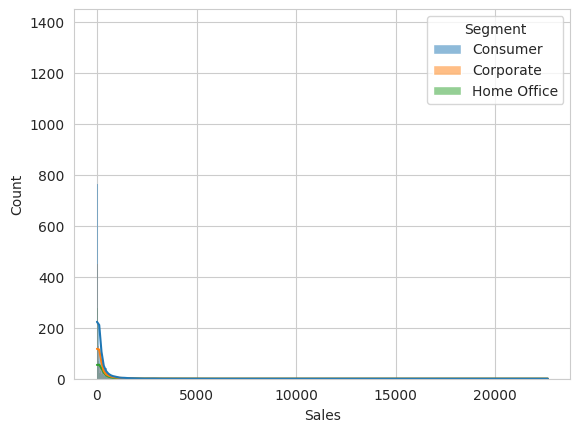

In [16]:
sns.histplot(data=df,x="Sales",kde=True, color="red", hue="Segment")
plt.show()

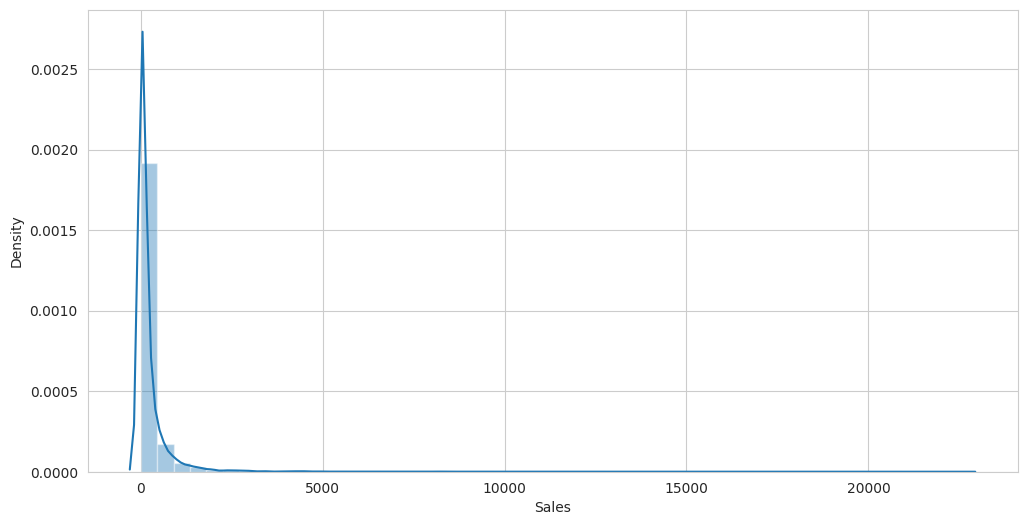

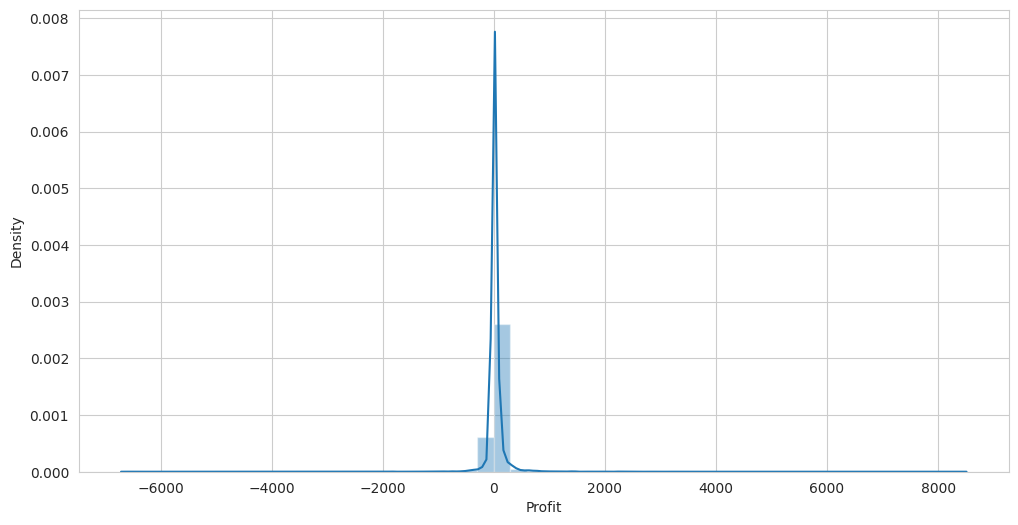

In [14]:
cols=['Sales',"Profit"]
for col in cols:
      plt.subplots(figsize=(12,6))
      sns.distplot(df[col])
      plt.show()

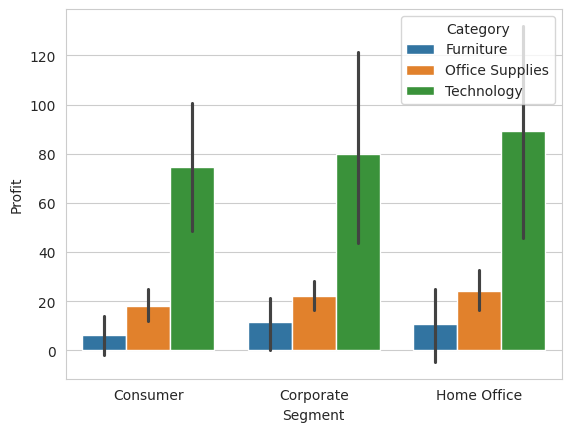

In [17]:
sns.barplot(data=df, x="Segment", y="Profit", hue="Category")
plt.show()

In [18]:
state_profit=df.groupby("State")["Profit"].sum()

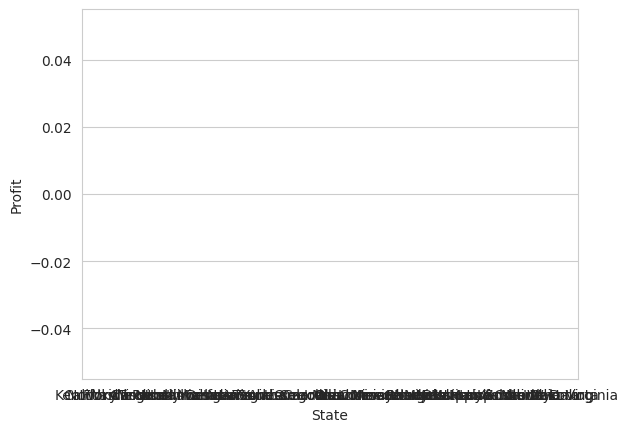

In [19]:
sns.barplot(x="State",y=state_profit, data=df)
plt.show()

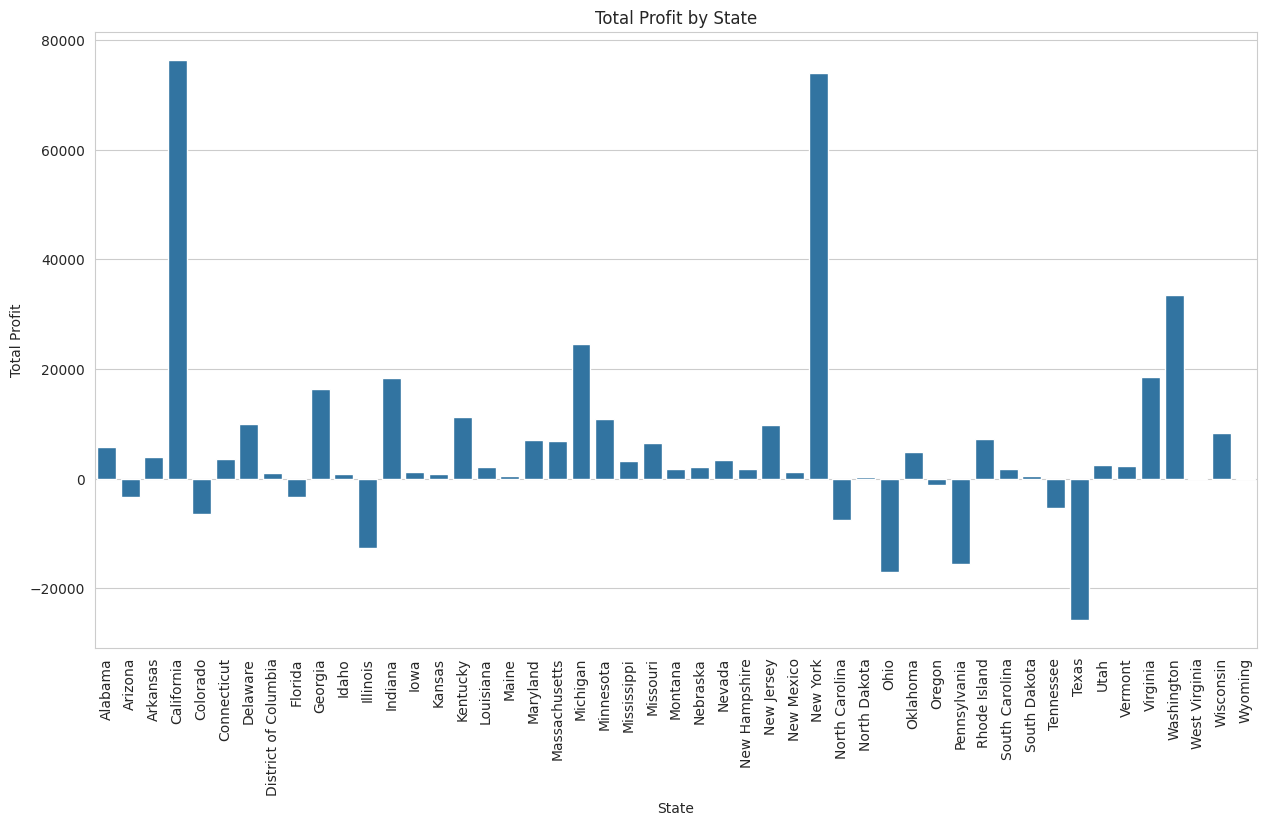

In [20]:
# prompt: groupby states and then show profit barplot

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.barplot(x=state_profit.index, y=state_profit.values)
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

In [21]:
state_profit

,Profit
State,
Alabama,5786.8253
Arizona,-3427.9246
Arkansas,4008.6871
California,76381.3871
Colorado,-6527.8579
Connecticut,3511.4918
Delaware,9977.3748
District of Columbia,1059.5893
Florida,-3399.3017


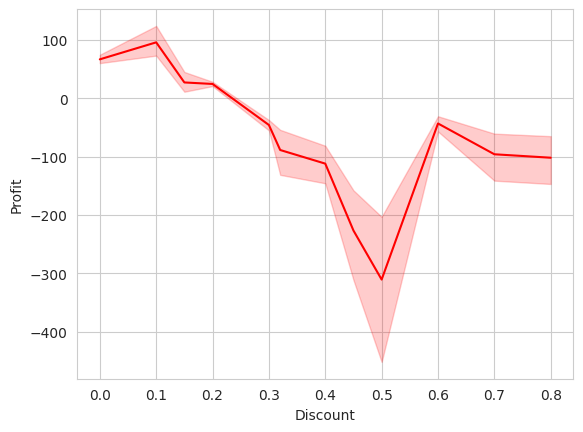

In [23]:
sns.lineplot(data=df, x="Discount",y="Profit", color="red")
plt.show()

In [24]:
category_profit= df.groupby("Category")["Profit"].sum()

In [25]:
category_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


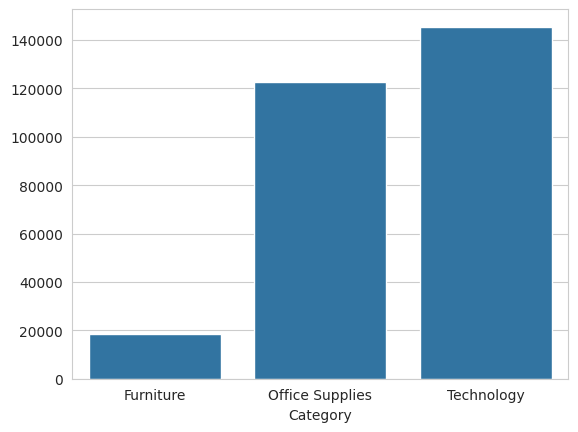

In [30]:
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.show()

In [32]:
ship_mode= df.groupby("Ship Mode")[["Sales","Profit"]].sum()

In [33]:
ship_mode

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


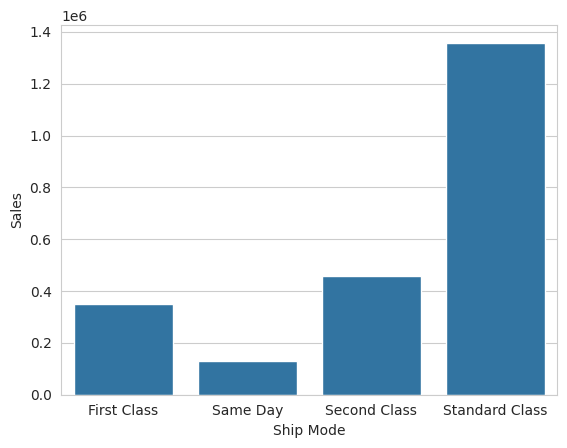

In [34]:
sns.barplot(x=ship_mode.index, y=ship_mode["Sales"])
plt.show()

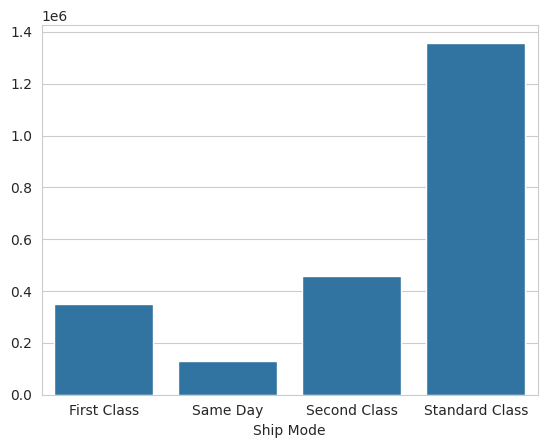

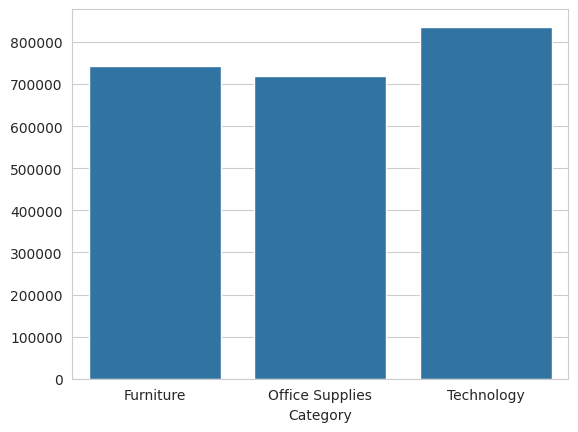

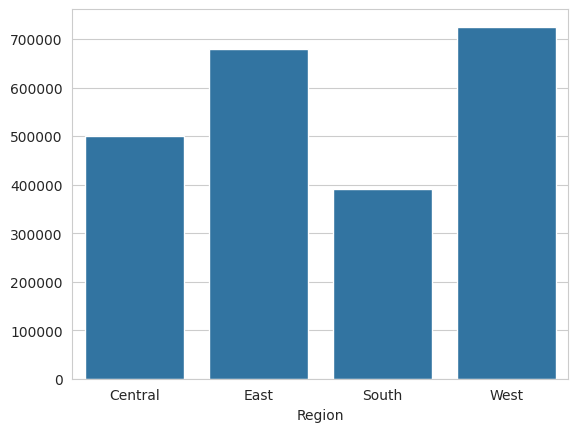

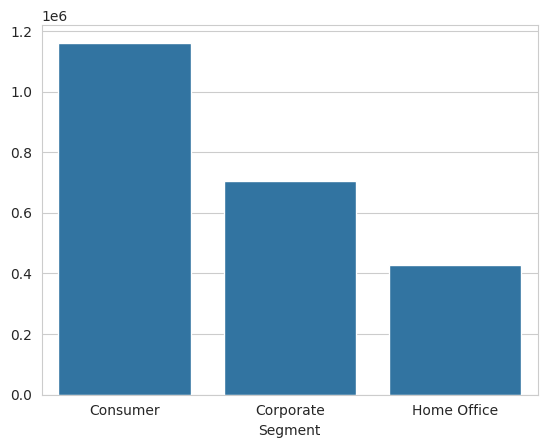

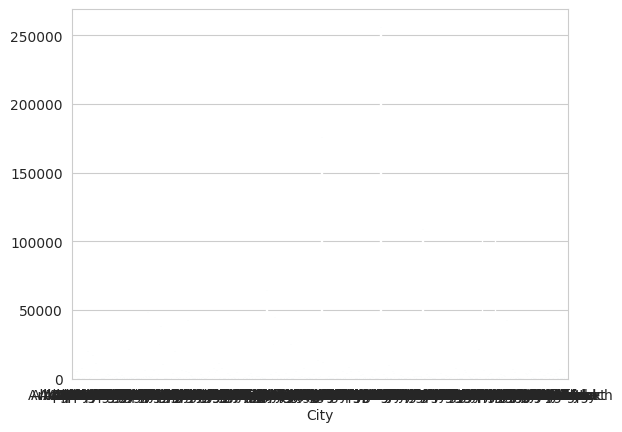

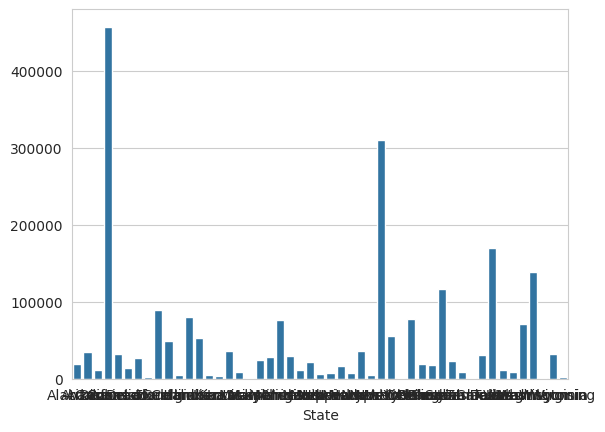

In [37]:
cols=["Ship Mode","Category","Region","Segment","City","State"]
for i in cols:
  i_sales= df.groupby(i)["Sales"].sum()
  sns.barplot(x=i_sales.index, y=i_sales.values)
  plt.show()

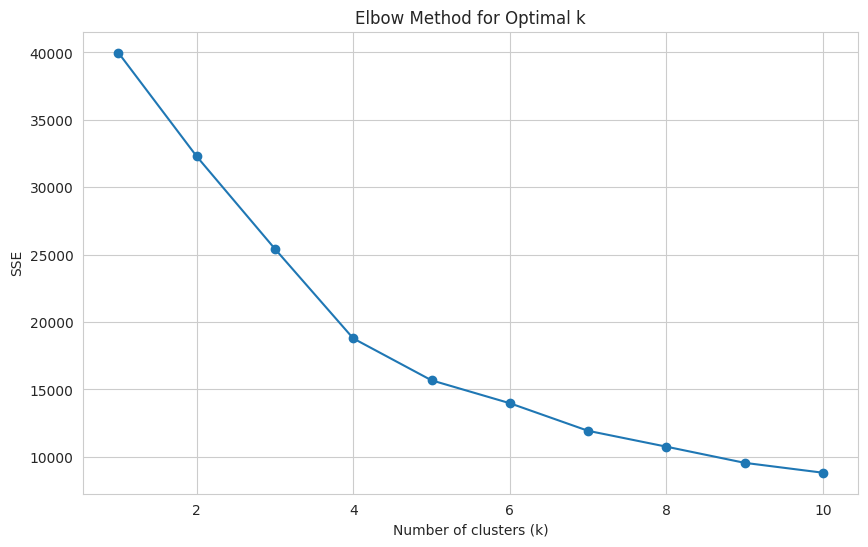

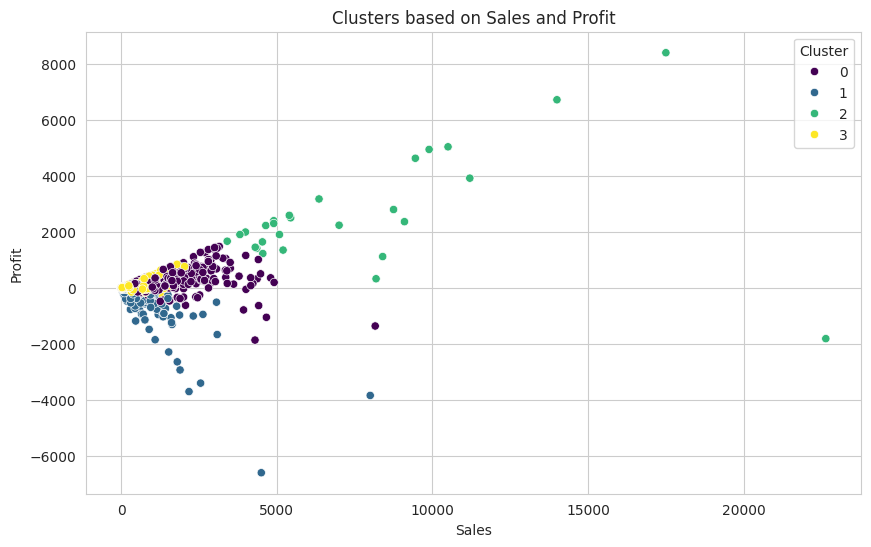

,Sales,Profit,Discount,Quantity
Cluster,,,,
0,407.908020,69.790464,0.094655,6.452784
1,153.637349,-108.306796,0.667960,3.836207
2,7685.179259,2610.220085,0.070370,5.185185
3,126.813585,21.516522,0.097487,2.533279


In [39]:
# prompt: I HAVE TO DO CLUSTERING

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering (e.g., Sales, Profit, Discount, Quantity)
# You might need to consider other features or engineered features depending on your goal
features = ['Sales', 'Profit', 'Discount', 'Quantity']
df_cluster = df[features].copy()

# Handle potential outliers or scale features
# For K-Means, it's good practice to scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the optimal number of clusters using the elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to avoid warnings
    kmeans.fit(df_scaled)
    sse[k] = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

# Based on the elbow plot, choose an appropriate number of clusters (e.g., 3 or 4)
# Let's assume k=4 for demonstration
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the clusters (e.g., by visualizing or summarizing cluster characteristics)
# You can visualize the clusters using scatter plots of the features
# For more than 2 features, you might need dimensionality reduction techniques like PCA

# Example: Scatter plot of Sales vs Profit, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.title('Clusters based on Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# You can also look at the mean of the features within each cluster
cluster_summary = df_cluster.groupby('Cluster')[features].mean()
cluster_summary

# Further steps could include:
# - Interpreting the characteristics of each cluster
# - Applying the cluster labels back to the original dataframe for further analysis
# - Using different clustering algorithms (e.g., DBSCAN, Agglomerative Clustering)
# - Validating the clusters using metrics like silhouette score
